In [2]:
#setting working directory
library(plyr)

crime_data = read.csv("crime_v2.csv")
paste(objects(crime_data))
head(crime_data)



[1] "avgsen"   "central"  "county"   "crmrte"   "density"  "mix"     
 [7] "pctmin80" "pctymle"  "polpc"    "prbarr"   "prbconv"  "prbpris" 
[13] "taxpc"    "urban"    "wcon"     "west"     "wfed"     "wfir"    
[19] "wloc"     "wmfg"     "wser"     "wsta"     "wtrd"     "wtuc"    
[25] "year"

county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
1,87,0.0356036,0.298270,0.527595997,0.436170,6.71,0.00182786,2.4226327,30.99368,⋯,408.7245,221.2701,453.1722,274.1775,334.54,477.58,292.09,311.91,0.08016878,0.07787097
3,87,0.0152532,0.132029,1.481480002,0.450000,6.35,0.00074588,1.0463320,26.89208,⋯,376.2542,196.0101,258.5650,192.3077,300.38,409.83,362.96,301.47,0.03022670,0.08260694
5,87,0.0129603,0.444444,0.267856985,0.600000,6.76,0.00123431,0.4127659,34.81605,⋯,372.2084,229.3209,305.9441,209.6972,237.65,358.98,331.53,281.37,0.46511629,0.07211538
7,87,0.0267532,0.364760,0.525424004,0.435484,7.14,0.00152994,0.4915572,42.94759,⋯,397.6901,191.1720,281.0651,256.7214,281.80,412.15,328.27,299.03,0.27362204,0.07353726
9,87,0.0106232,0.518219,0.476563007,0.442623,8.22,0.00086018,0.5469484,28.05474,⋯,377.3126,206.8215,289.3125,215.1933,290.89,377.35,367.23,342.82,0.06008584,0.07069755
11,87,0.0146067,0.524664,0.068376102,0.500000,13.00,0.00288203,0.6113361,35.22974,⋯,401.3378,187.8255,258.5650,237.1507,258.60,391.48,325.71,275.22,0.31952664,0.09891920


In [3]:
str(crime_data)

'data.frame':	97 obs. of  25 variables:
 $ county  : int  1 3 5 7 9 11 13 15 17 19 ...
 $ year    : int  87 87 87 87 87 87 87 87 87 87 ...
 $ crmrte  : num  0.0356 0.0153 0.013 0.0268 0.0106 ...
 $ prbarr  : num  0.298 0.132 0.444 0.365 0.518 ...
 $ prbconv : Factor w/ 92 levels "","`","0.068376102",..: 63 89 13 62 52 3 59 78 42 86 ...
 $ prbpris : num  0.436 0.45 0.6 0.435 0.443 ...
 $ avgsen  : num  6.71 6.35 6.76 7.14 8.22 ...
 $ polpc   : num  0.001828 0.000746 0.001234 0.00153 0.00086 ...
 $ density : num  2.423 1.046 0.413 0.492 0.547 ...
 $ taxpc   : num  31 26.9 34.8 42.9 28.1 ...
 $ west    : int  0 0 1 0 1 1 0 0 0 0 ...
 $ central : int  1 1 0 1 0 0 0 0 0 0 ...
 $ urban   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pctmin80: num  20.22 7.92 3.16 47.92 1.8 ...
 $ wcon    : num  281 255 227 375 292 ...
 $ wtuc    : num  409 376 372 398 377 ...
 $ wtrd    : num  221 196 229 191 207 ...
 $ wfir    : num  453 259 306 281 289 ...
 $ wser    : num  274 192 210 257 215 ...
 $ wmfg    : num  33

In [11]:
#Identify counties with incomplete data
count(!complete.cases(crime_data))

#looks like there are 6 counties missing all the data
crime_data[!complete.cases(crime_data),]

x,freq
FALSE,91
TRUE,6


,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
92,NA,NA,NA,NA,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
93,NA,NA,NA,NA,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
94,NA,NA,NA,NA,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
95,NA,NA,NA,NA,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
96,NA,NA,NA,NA,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
97,NA,NA,NA,NA,`,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


` 0.068376102 0.140350997 0.154451996 0.203724995 
          5           1           1           1           1           1 
0.207830995    0.220339 0.226361006 0.229589999 0.248275995 0.259833008 
          1           1           1           1           1           1 
0.267856985 0.271946996  0.28947401 0.300577998 0.308411002 0.314606994 
          1           1           1           1           1           1 
0.322580993 0.325300992 0.327868998 0.328664005 0.334701002 0.340490997 
          1           1           1           1           1           1 
0.343023002 0.347799987 0.352941006  0.36015299 0.364353001 0.371879011 
          1           1           1           1           1           1 
   0.381908 0.384236008 0.385495991 0.386925995 0.393413007    0.401198 
          1           1           1           1           1           1 
0.403780013 0.406780005 0.410596013 0.412698001 0.426777989 0.436441004 
          1           1           1           1           1           1 
0.438960999 0.443114012 0.443681002 0.449999988 0.450567007 0.452829987 
          1           1           1           1           1           1 
0.457210004 0.459215999 0.468531013 0.476563007 0.477732986 0.492940009 
          1           1           1           1           1           1 
0.493438005 0.495575011  0.50819701 0.515464008 0.520606995 0.520709991 
          1           1           1           1           1           1 
0.522387981 0.525424004 0.527595997 0.528302014 0.548494995 0.549019992 
          1           1           1           1           1           1 
0.559822977 0.571429014 0.573943973 0.588859022 0.589905024 0.595077991 
          1           1           1           2           1           1 
 0.62251699 0.722972989 0.736908972 0.739394009 0.763333023 0.769231021 
          1           1           1           1           1           1 
0.781608999 0.793232977 0.909090996 0.972972989 1.015380025 1.068969965 
          1           1           1           1           1           1 
1.182929993 1.225610018 1.234380007 1.358139992 1.481480002         1.5 
          1           1           1           1           1           1 
1.670519948 2.121210098 
          1           1

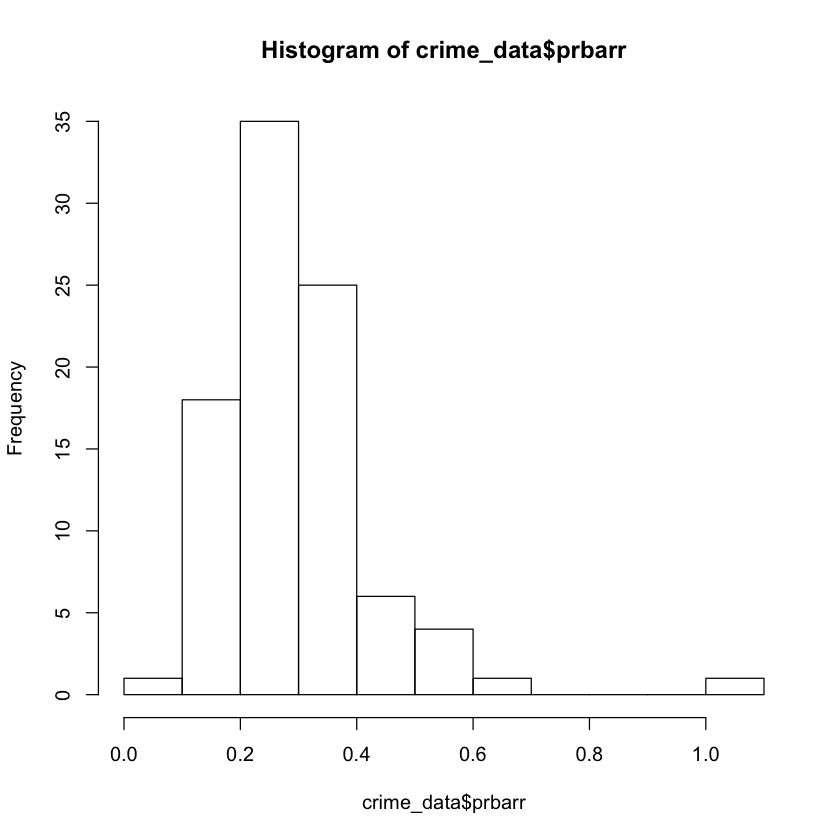

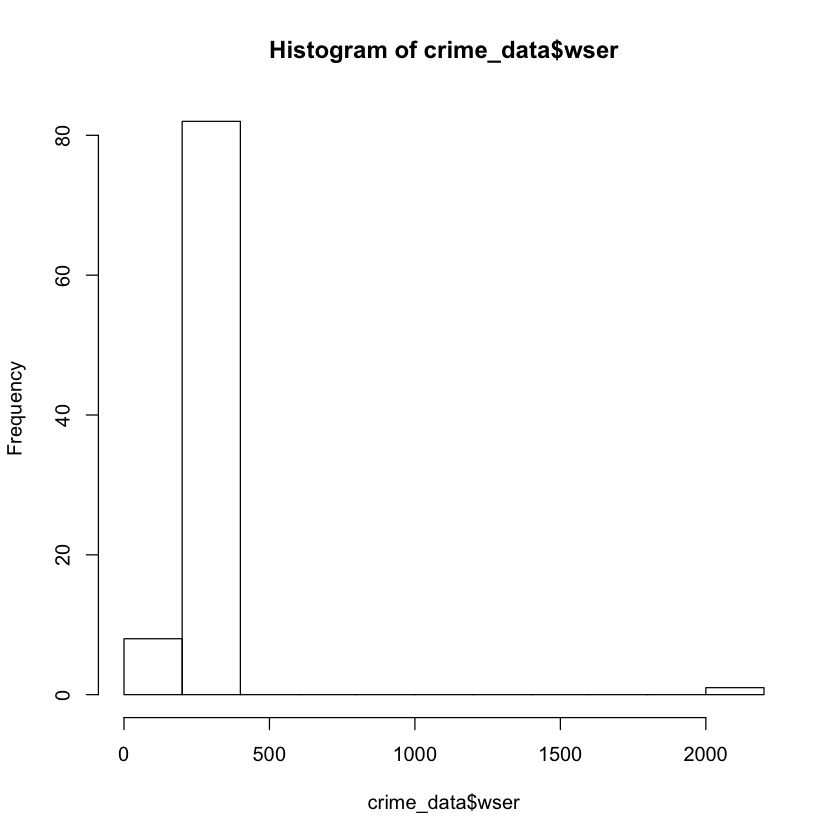

In [23]:
#prob convict is not all numeric data, need to clean one value is " ' "
summary(crime_data$prbconv)

# Notice that the probabilities below have more than 100% probability, this is an error
hist(crime_data$prbarr)

#there seems to be one outlier in service industry wage making $2,177 per week.  Explore this
hist(crime_data$wser)

In [35]:
#97th entry has single quote
crime_data$prbconv[97]

#updated df has no na
df2 = na.omit(crime_data)

#cast prbconv as numeric
df2$prbconv_new = as.numeric(as.character(df2$prbconv))

#now quote is NA
df2$prbconv_new[97]

[1] `
92 Levels:  ` 0.068376102 0.140350997 0.154451996 0.203724995 ... 2.121210098

[1] NA

[1] "duplicate counties"

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle,prbconv_new
89,193,87,0.0235277,0.266055,0.588859022,0.423423,5.86,0.00117887,0.8138298,28.51783,⋯,268.3836,365.0196,295.9352,295.63,468.26,337.88,348.74,0.1105016,0.07819394,0.588859


[1] "data check"

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle,prbconv_new
88,193,87,0.0235277,0.266055,0.588859022,0.423423,5.86,0.00117887,0.8138298,28.51783,⋯,268.3836,365.0196,295.9352,295.63,468.26,337.88,348.74,0.1105016,0.07819394,0.588859
89,193,87,0.0235277,0.266055,0.588859022,0.423423,5.86,0.00117887,0.8138298,28.51783,⋯,268.3836,365.0196,295.9352,295.63,468.26,337.88,348.74,0.1105016,0.07819394,0.588859


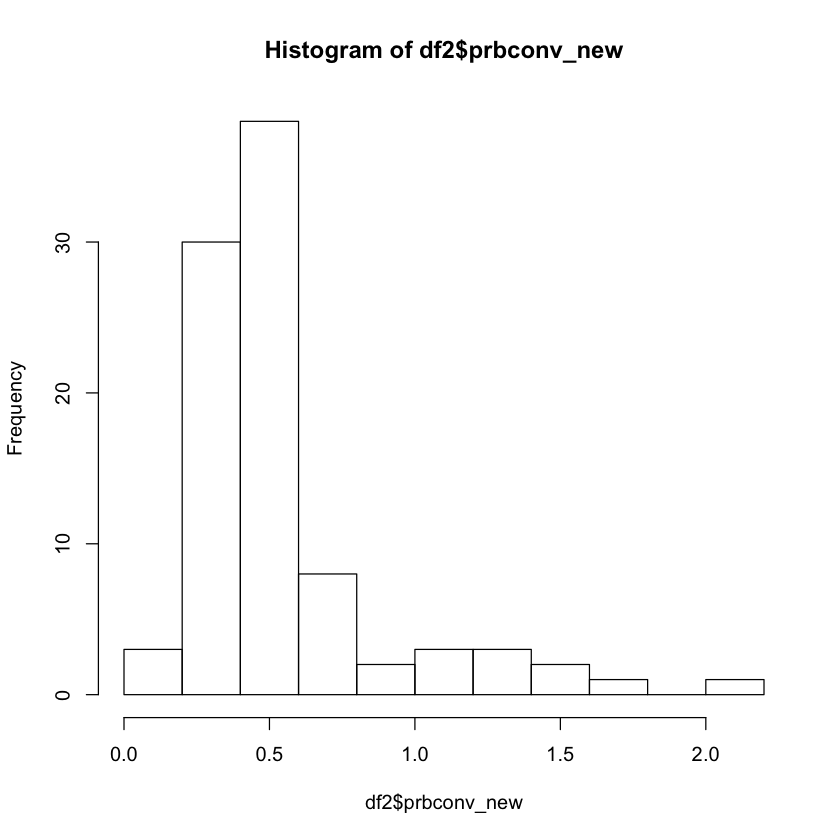

In [73]:
#duplicate county 193
paste('duplicate counties')
df2[duplicated(df2$county),]

# Data is the same
paste('data check')
df2[which(df2$county == 193),]

#new df dropping duplicates
df3 = df2[!duplicated(df2$county),]


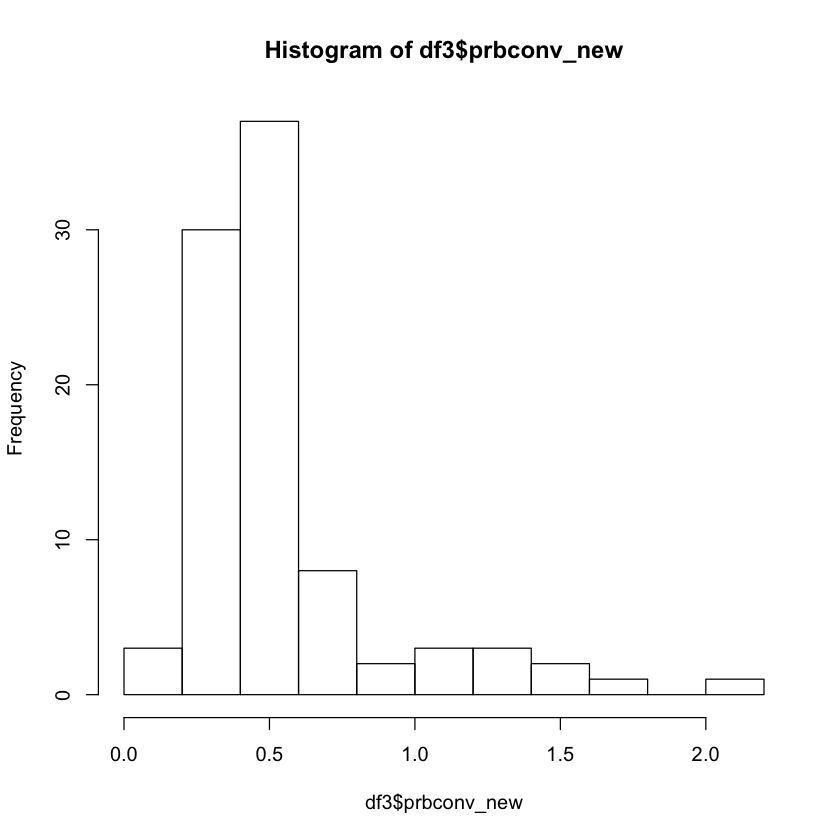

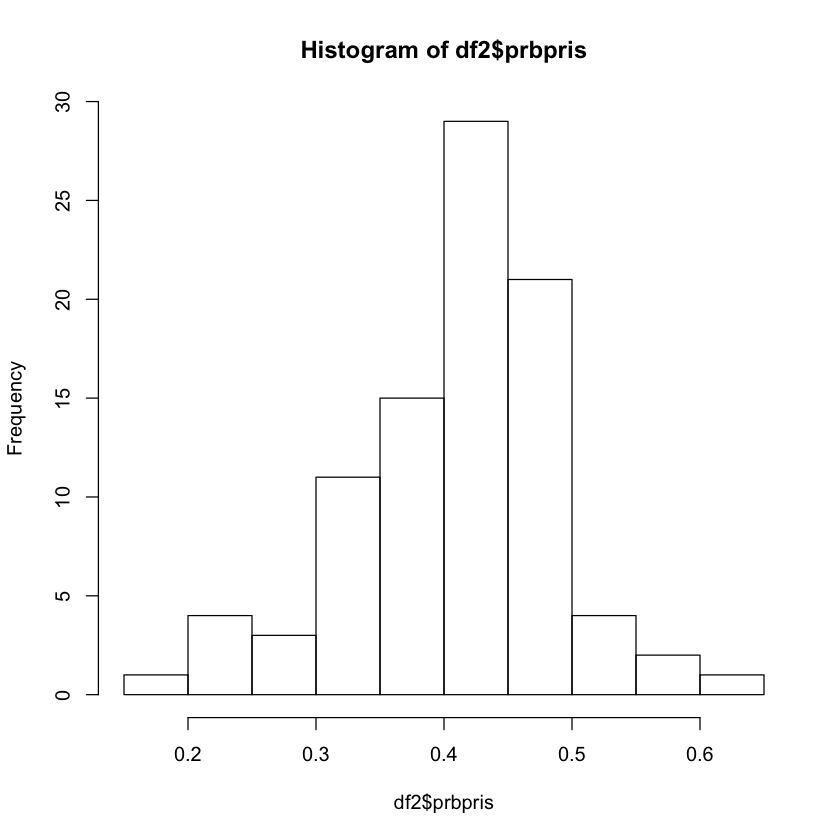

In [74]:
#prvconv is the ratio of convictions to arrests.  Why would there ever be more convictions than arrests?
hist(df3$prbconv_new)

#prbpris is convictions resulting in prison to total convictions.  Looks good

hist(df2$prbpris)

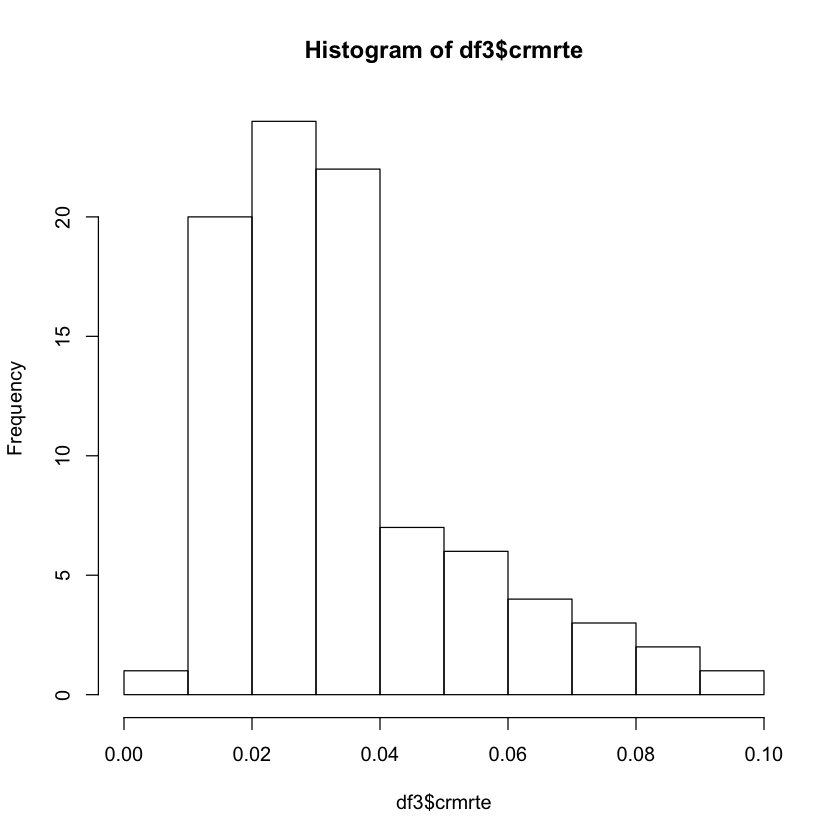

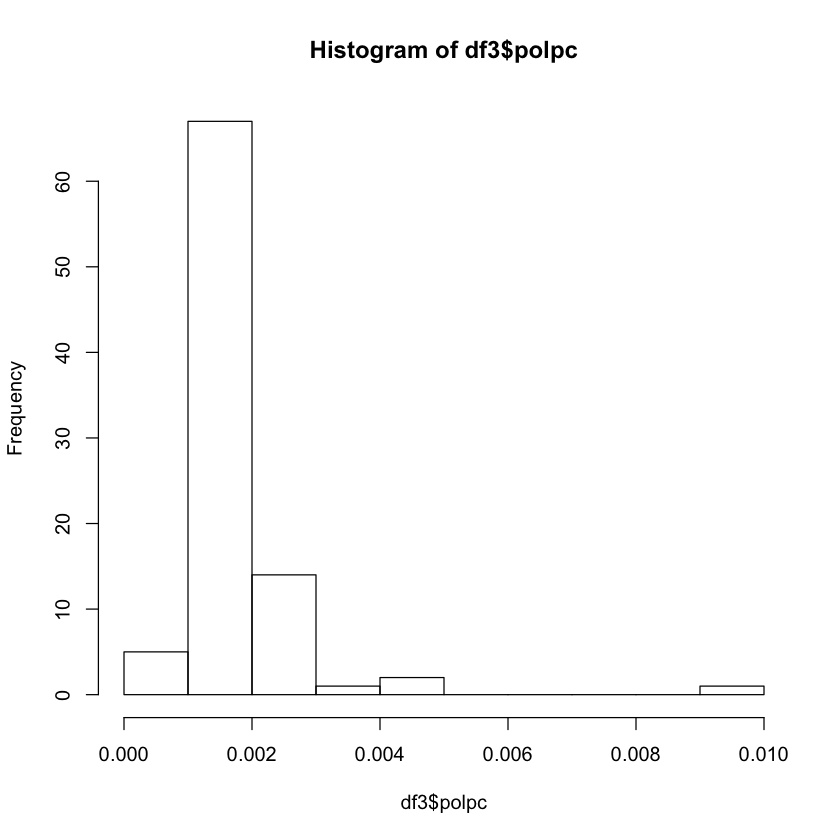

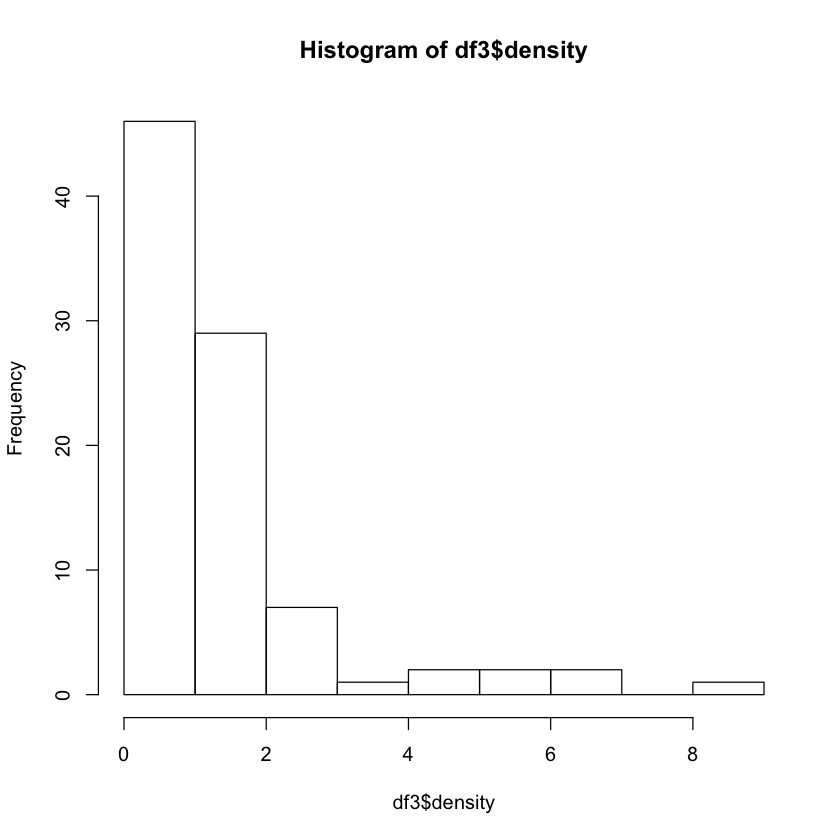

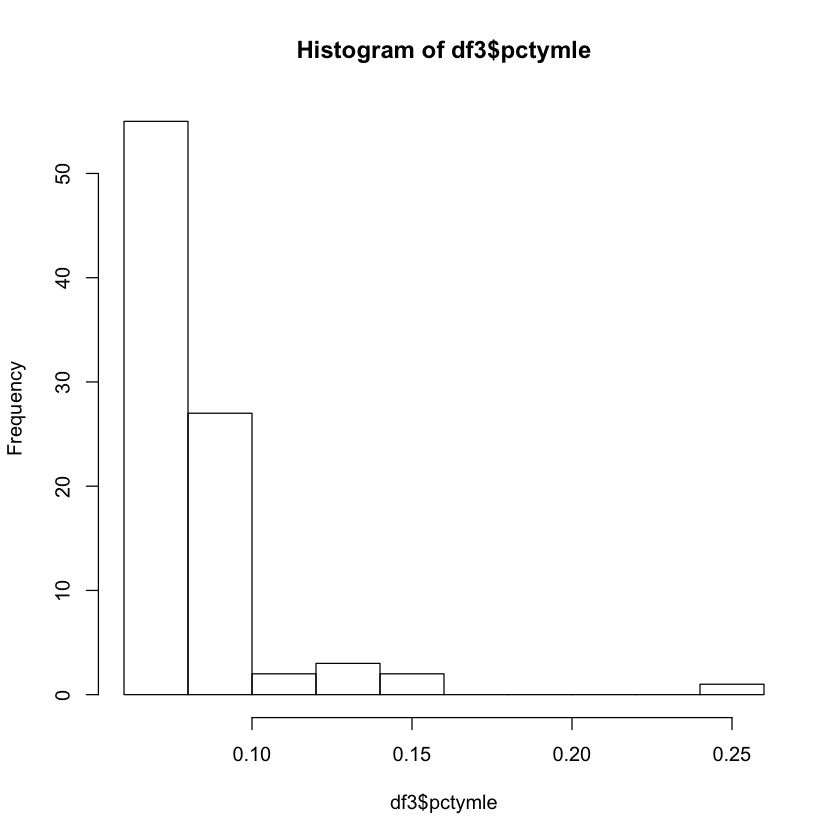

In [68]:
#sanity checks with quick hist plots
hist(df3$crmrte)
hist(df3$polpc)
hist(df3$density)
hist(df3$pctymle)
hist(df3$pctymle)

In [72]:
#exploring prob arrest.  It looks like only county 115 had an issue
df3[ which(df3$prbarr > 1),]


,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle,prbconv_new
51,115,87,0.0055332,1.09091,1.5,0.5,20.7,0.00905433,0.3858093,28.1931,⋯,217.4908,342.4658,245.2061,448.42,442.2,340.39,386.12,0.1,0.07253495,1.5


In [77]:
install.packages("corrplot")
library(corrplot)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


ERROR: Error in -c("prbconv"): invalid argument to unary operator


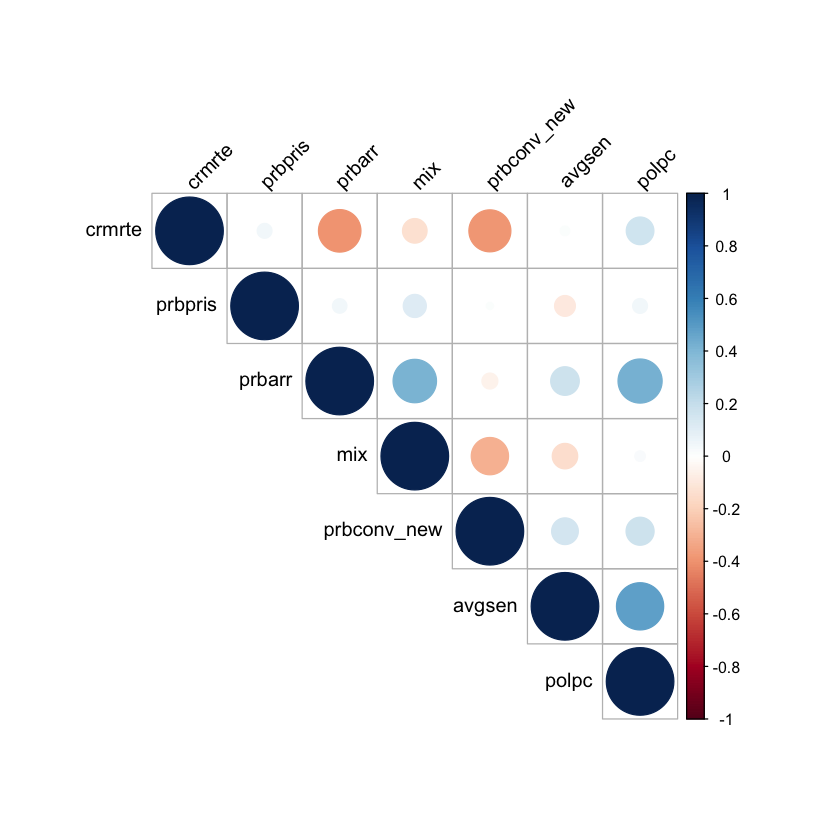

In [95]:
# Correlation plot of crime rate and legal variables
legal_cor <- cor(df3[c('crmrte','prbarr','prbpris','avgsen','polpc','prbconv_new', 'mix')])

corrplot(legal_cor, type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45)

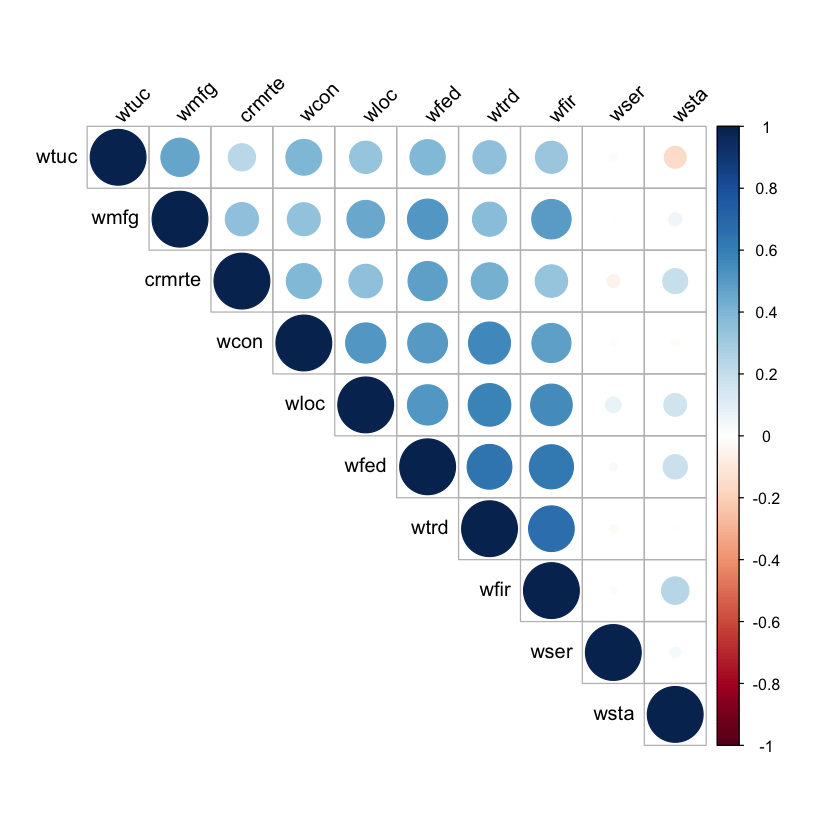

In [96]:
# Correlation plot of crime rate and wage variables
wage_cor <- cor(df3[c('crmrte','wcon', 'wtuc' ,'wtrd' ,'wfir', 'wser', 'wmfg' ,'wfed' ,'wsta' ,'wloc')])

corrplot(wage_cor, type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45)

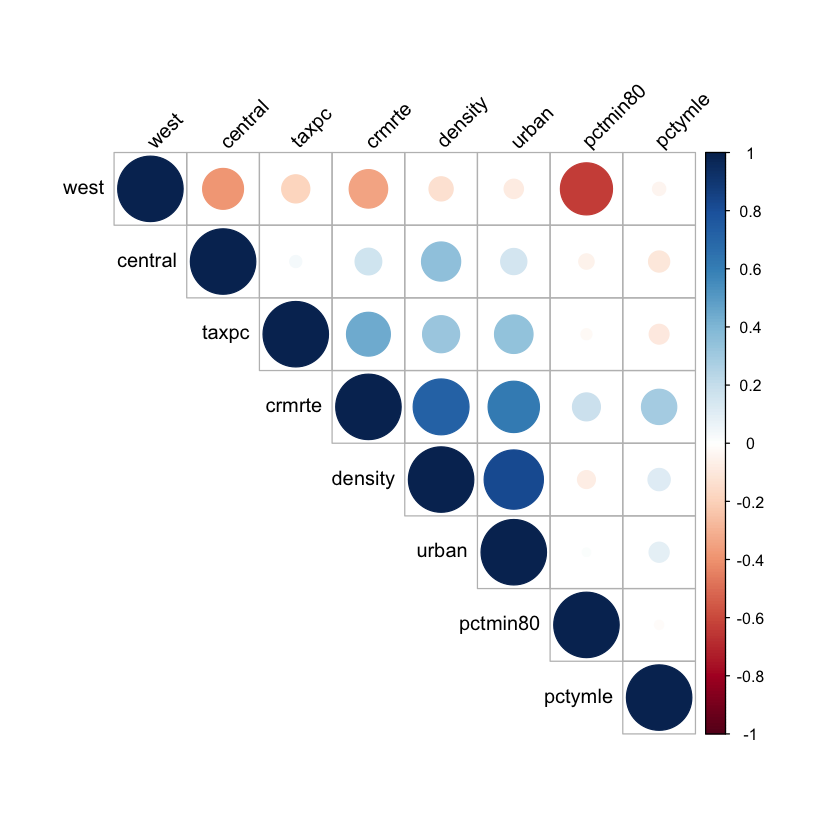

In [101]:
# Correlation plot of crime rate and demographic variables
demo_cor <- cor(df3[c('crmrte', 'density' ,'taxpc', 'west' ,'central' ,'urban' ,'pctmin80', 'pctymle')])

corrplot(demo_cor, type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45)

### Indep variables to explore ###

- prbarr (- corr)
- density (+ corr)
- pctymle (+ corr)
